# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (6.28*2, 7.21*2)

## визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)


In [2]:
df_geo=pd.read_excel('geo.xlsx')

In [2]:
!ls

 geo_comment.xlsx   geo.xlsx  'homework clustering.ipynb'


In [3]:
df_geo_comment=pd.read_excel('geo_comment.xlsx')

In [5]:
df_geo.head()

x          y  comment_class
0  37.612416  55.777454             -1
1  37.612416  55.777454             -1
2  37.603298  55.742108             -1
3  37.558526  55.728758             -1
4  37.566431  55.731794             -1

In [54]:
df_geo.describe()

x              y  comment_class
count  108806.000000  108806.000000  108806.000000
mean       37.567532      55.766346      -0.748929
std         0.121996       0.069622       0.662653
min        37.148813      55.496939      -1.000000
25%        37.454528      55.729797      -1.000000
50%        37.559640      55.764734      -1.000000
75%        37.684784      55.806869      -1.000000
max        37.931228      55.994174       1.000000

In [56]:
df_geo[(df_geo['y']==55.994174)]

x          y  comment_class
2630  37.21333  55.994174             -1
2631  37.21333  55.994174             -1
2632  37.21333  55.994174             -1
2633  37.21333  55.994174             -1
2634  37.21333  55.994174             -1
2635  37.21333  55.994174              1

In [4]:
#Считаем крайние точки и берем отступ 5% для "полей"
x_max=df_geo['x'].max() #37.931228	
y_max=df_geo['y'].max() #y_max  	55.994174
x_min=df_geo['x'].min() #X-min 37.148813 
y_min=df_geo['y'].min()  #	 55.496939
print(y_max, x_max, y_min,  x_min)
fields=0.05 # borders ?
x_left=x_min-fields*(x_max-x_min)
x_right=x_max+fields*(x_max-x_min)
y_down=y_min-fields*(y_max-y_min)
y_up=y_max+fields*(y_max-y_min)
print(y_down, x_left, y_up,  x_right)


55.994174 37.931228 55.496939 37.148813
55.47207725 37.109692249999995 56.01903575 37.97034875


In [ ]:
[37.931228, 55.994174, 
 37.148813, 55.496939]

In [5]:
df_geo_comment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70382 entries, 0 to 70381
Data columns (total 5 columns):
x                70382 non-null float64
y                70382 non-null float64
comment_class    70382 non-null int64
multiplier       70382 non-null int64
comment          70382 non-null object
dtypes: float64(2), int64(2), object(1)
memory usage: 3.2+ MB


In [ ]:
#Проверка соответствия датасетов

In [71]:
df_grouped= \
    df_geo_comment.groupby(['x', 'y'], as_index=False)['multiplier'].sum().rename(columns={'multiplier':'nmb'})
#df_geo_comment.groupby(['x', 'y']).agg({'multiplier': {'nmb': 'sum'}}).reset_index()#.reset_index(level='nmb')

In [73]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2542 entries, 0 to 2541
Data columns (total 3 columns):
x      2542 non-null float64
y      2542 non-null float64
nmb    2542 non-null int64
dtypes: float64(2), int64(1)
memory usage: 79.4 KB


In [12]:
df_geo['comment_class'].count()

108806

In [16]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108806 entries, 0 to 108805
Data columns (total 3 columns):
x                108806 non-null float64
y                108806 non-null float64
comment_class    108806 non-null int64
dtypes: float64(2), int64(1)
memory usage: 3.3 MB


In [37]:
ls!

ls: cannot access '!': No such file or directory


In [101]:
# берем картинку Москвы из Яндекса, с границами в ранее посчитанных крайних точках
import matplotlib.image as mpimg 

#path='/home/arseny/data/4 building models/data-scientist4-master (12 Sklearn)/3. Python Preprocessing/Sklearn/Y_train.csv'
#path='/home/arseny/cheat sheets books presentations/pictures cheat Sheets/'
path='/home/arseny/Pictures/'

#f_name='Seaborn_Cheatsheet_Datacamp.png'
f_name='mos_map.jpg'

full_name=path+f_name
#map_img = mpimg.imread('tunis.png') 
map_img = mpimg.imread(full_name) 
#'/home/arseny/cheat sheets books presentations/pictures cheat Sheets/Seaborn_Cheatsheet_Datacamp.png'
#full_name

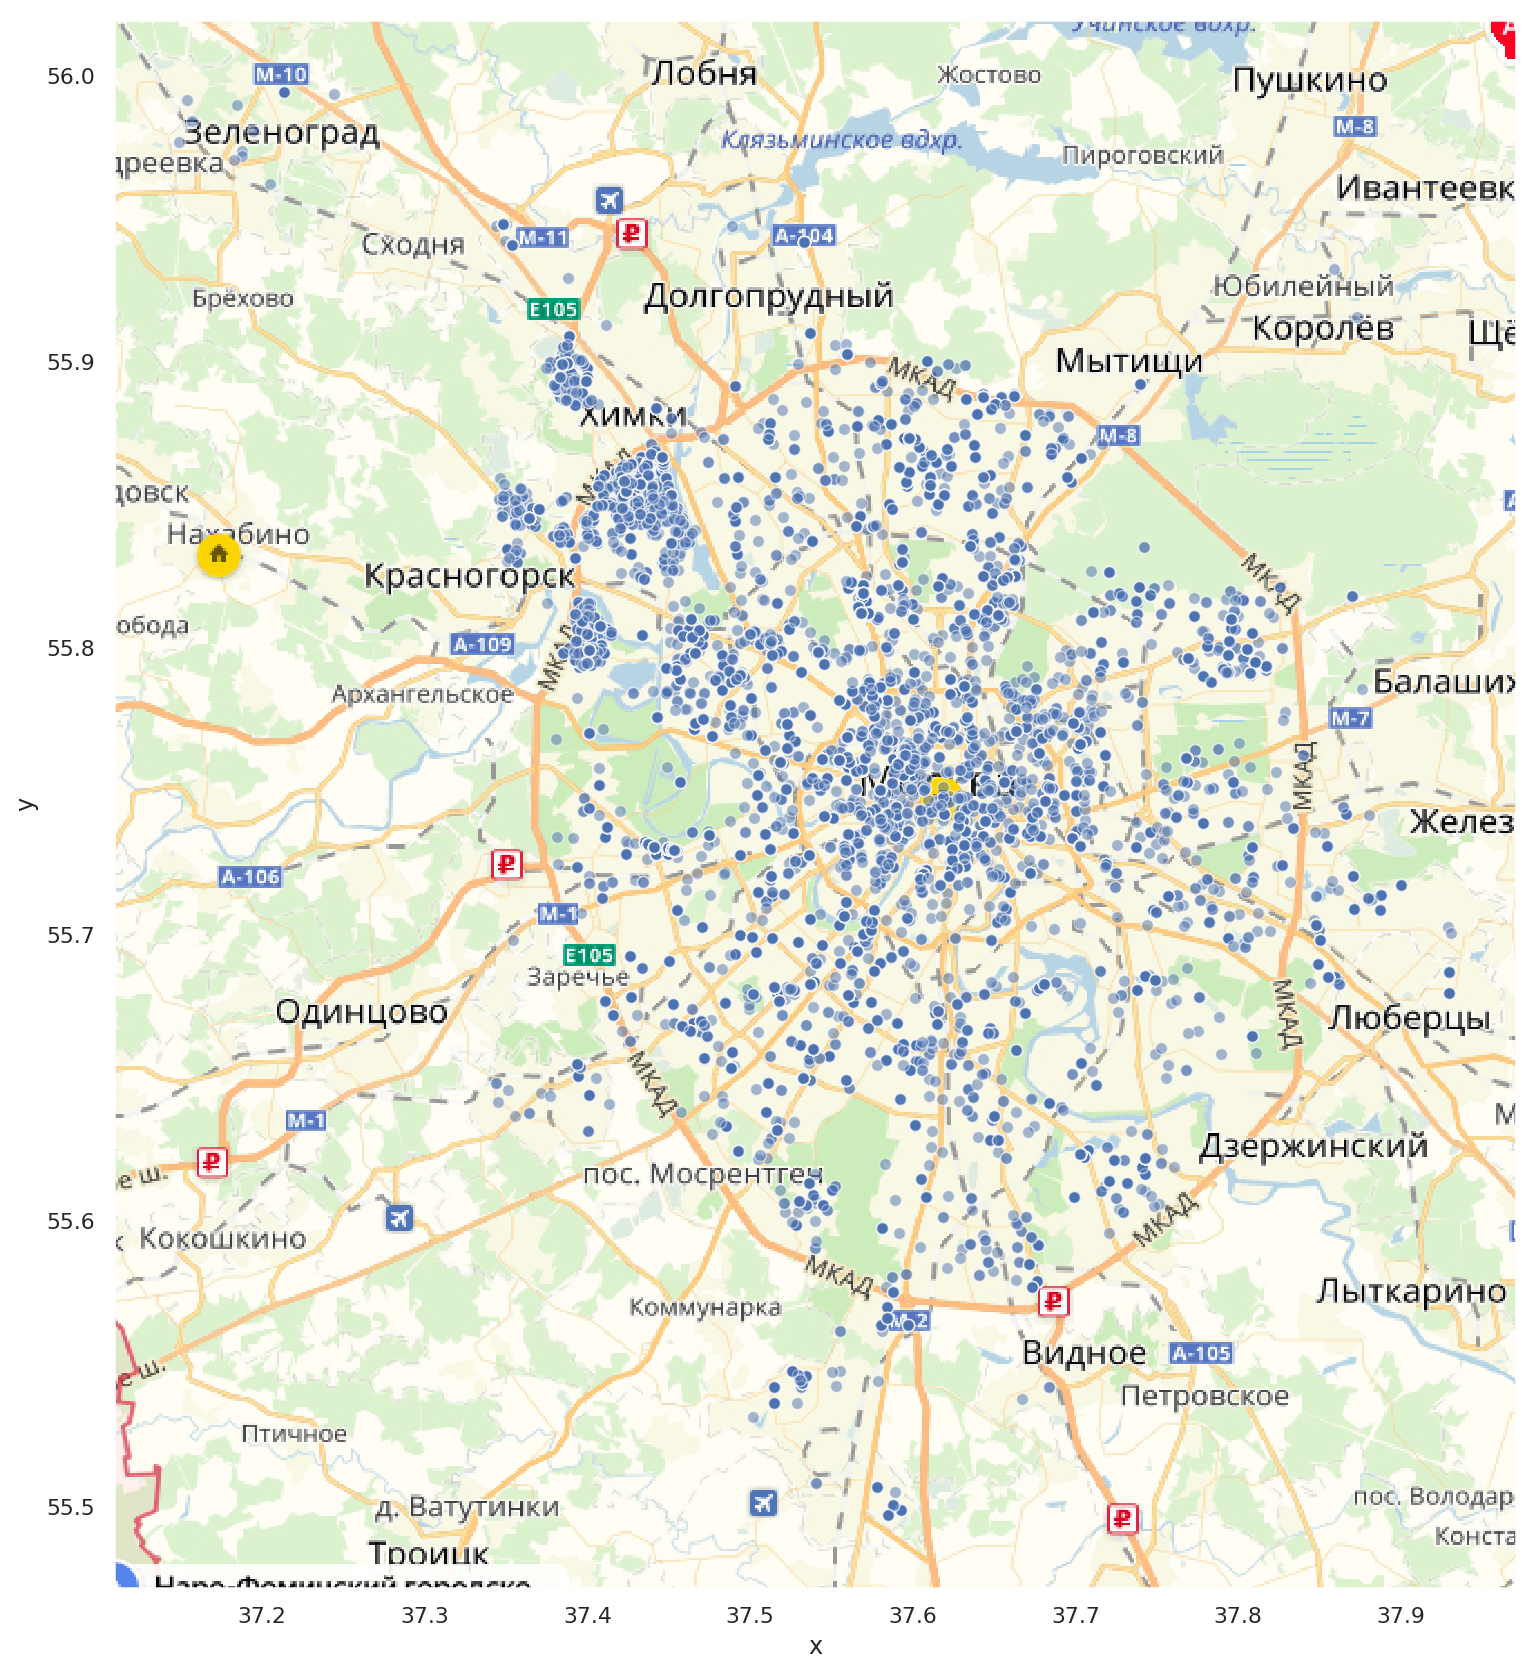

In [19]:
# рисуем на подложке из картинки
hmax = sns.scatterplot(x="x", y="y",
                      data=df_geo,
                        cmap = plt.cm.winter, 
                       alpha = 0.5, # whole scatterplot is translucent 
                       #annot = True,
                       zorder = 2,
            )

#sns.plt.ylim(y_down, y_up)
#sns.plt.xlim(x_left, x_right)

hmax.imshow(map_img,
          aspect = hmax.get_aspect(),
          extent = hmax.get_xlim() + hmax.get_ylim(),
          zorder = 1) #put the map under the scatterplot

In [45]:
#sns.palplot(sns.color_palette("RdBu", n_colors=8, desat=.5))

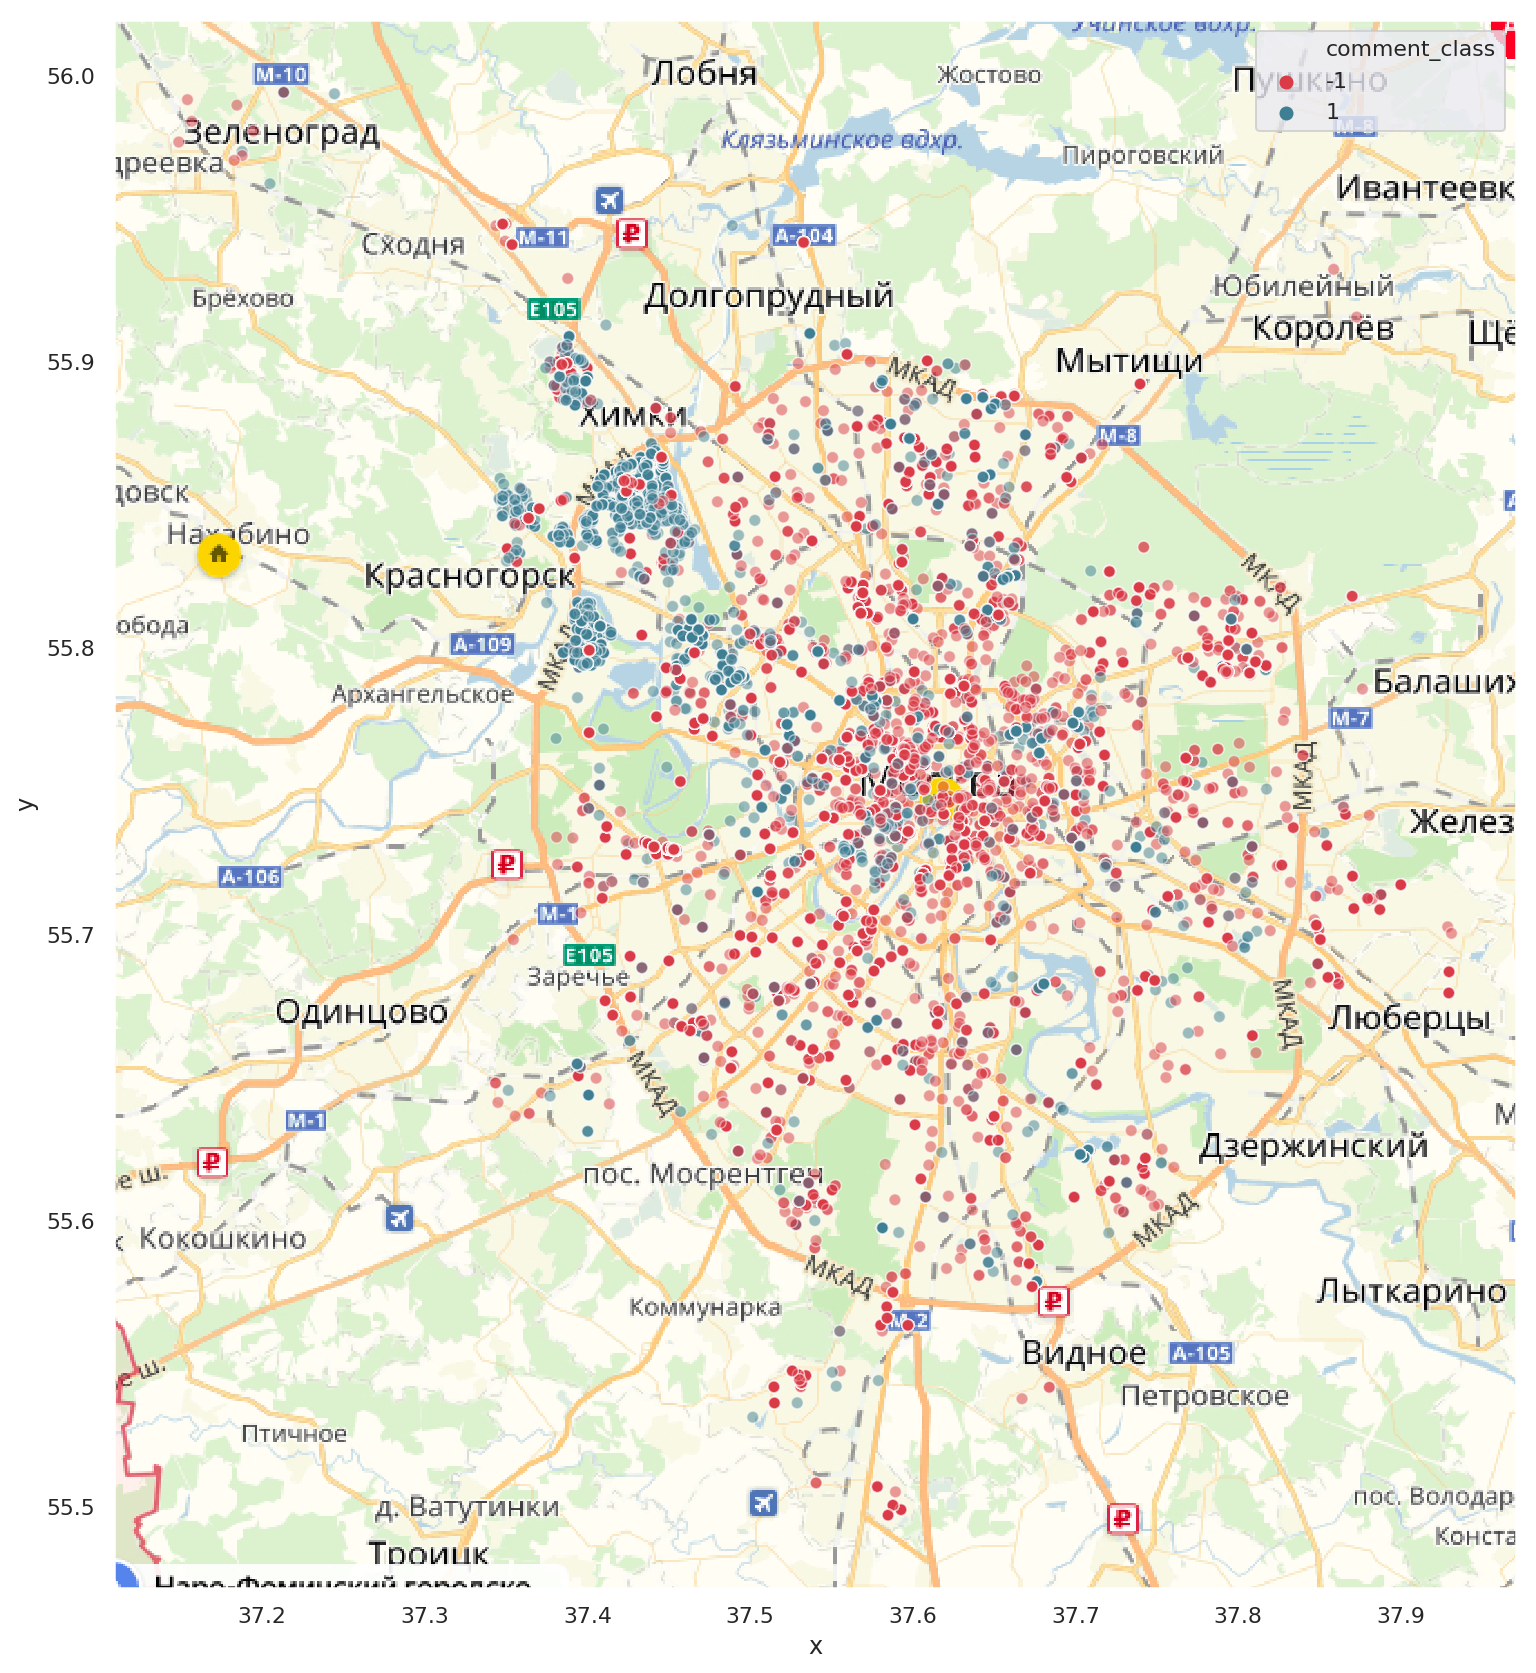

In [44]:
#Аналогично за и против
hmax = sns.scatterplot(x="x", y="y",
                      data=df_geo,
                        #cmap = plt.cm.summer,
                       #palette=sns.color_palette("RdBu", n_colors=2, desat=.95),
                       palette=sns.diverging_palette(10, 220, sep=80, n=2),
                       hue='comment_class',
                       alpha = 0.5, # whole scatterplot is translucent 
                       #annot = True,
                       zorder = 8,
            )

#sns.plt.ylim(y_down, y_up)
#sns.plt.xlim(x_left, x_right)

hmax.imshow(map_img,
          aspect = hmax.get_aspect(),
          extent = hmax.get_xlim() + hmax.get_ylim(),
          zorder = 1) #put the map under the scatterplot

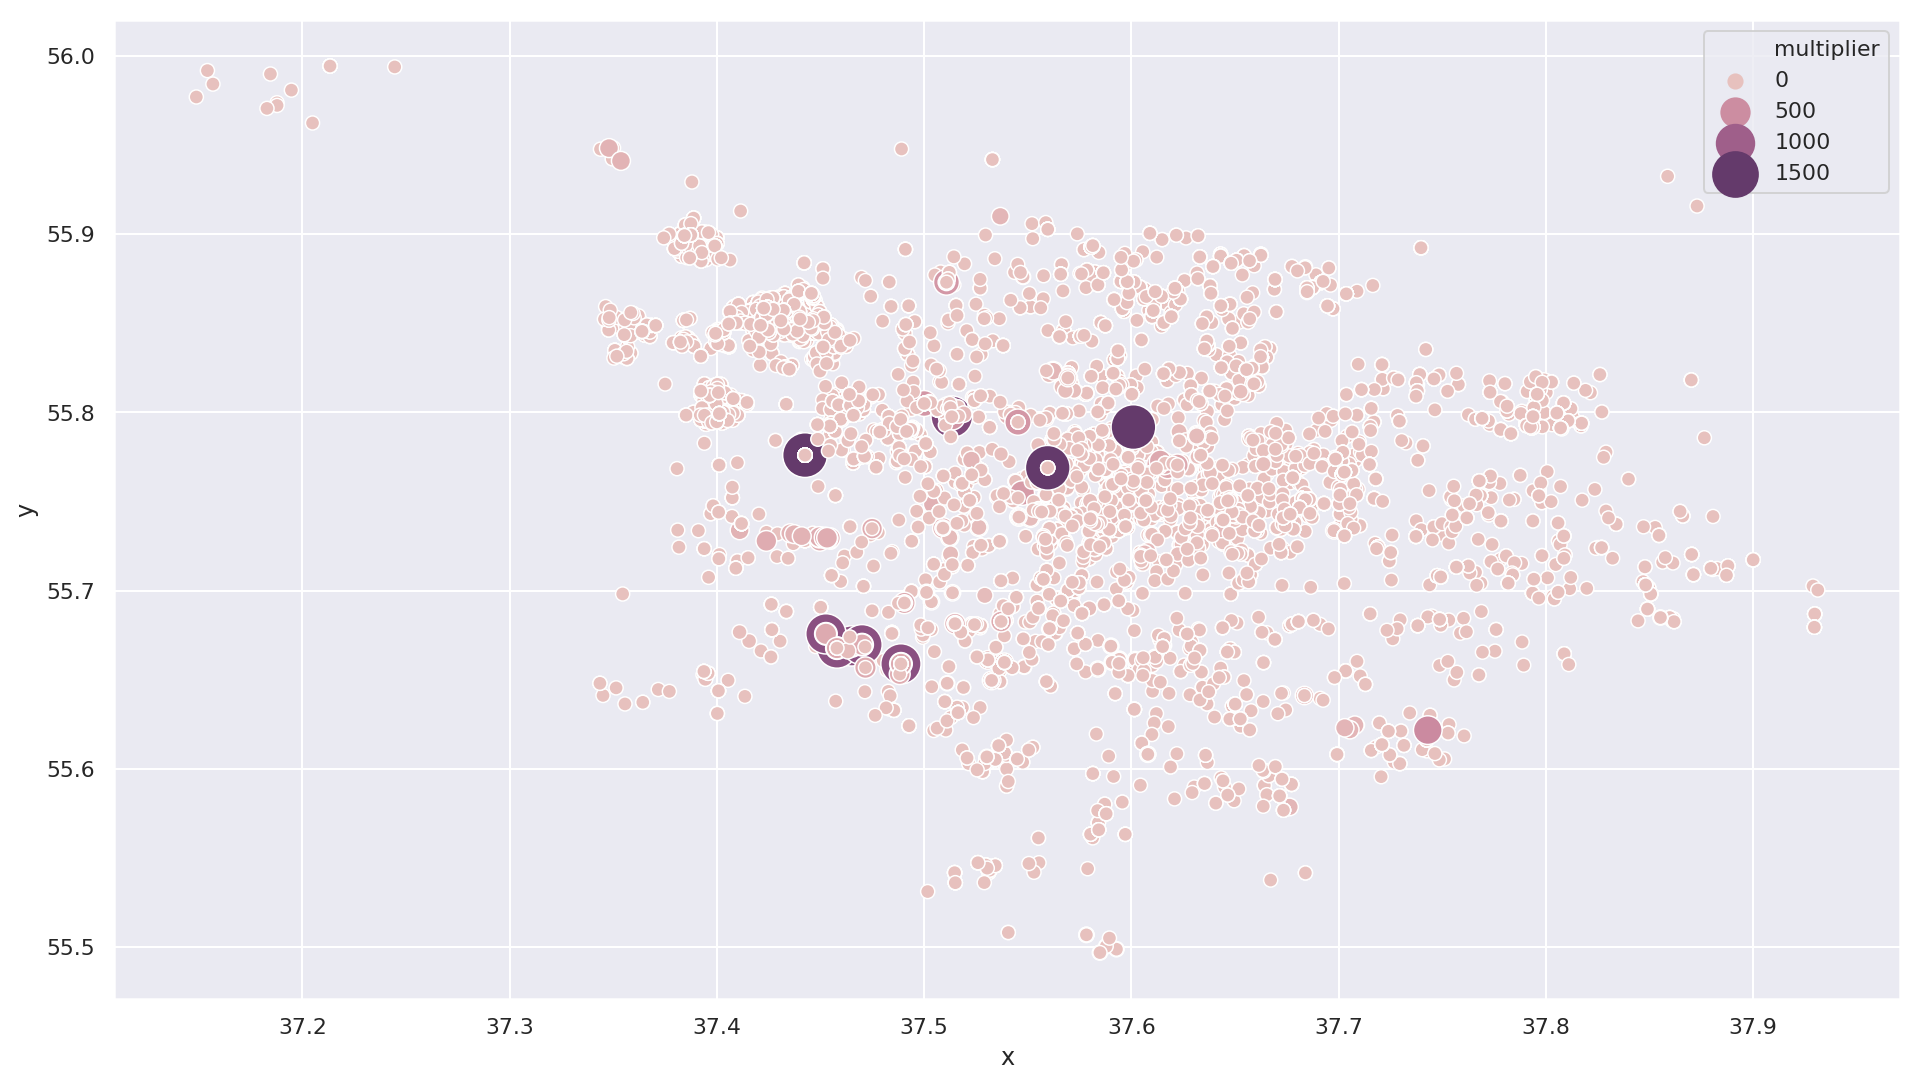

In [36]:
#Размер точек и подкрашивание визуально мало о чем говорят
#cmap = sns.cubehelix_palette(rot=-0.3, as_cmap=True)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="x", y="y",
                     hue="multiplier", 
                     size="multiplier",
                     palette=cmap, sizes=(50, 500),
                     data=df_geo)

In [74]:
#попытка посчитать число соседей для каждой точки в радиусе 1 км. с помощью sql
import timeit
import sqlite3

In [75]:
%%timeit?

In [79]:
%%time 
#start = timeit.timeit()

conn=sqlite3.connect('transactions.db')
df_grouped.to_sql('test_trans', if_exists='replace', con=conn)

#end = timeit.timeit()
#print(end - start)

#df_geo.to_sql('test_trans2', if_exists='replace', con=conn)

CPU times: user 364 ms, sys: 56.9 ms, total: 421 ms
Wall time: 1.94 s


In [80]:
#добавление индекса для ускорения запроса
t = ('RHAT',)
conn.execute('CREATE INDEX index_sup \
ON test_trans ([index])')
#print(conn.fetchone())

In [82]:
#counting neighbours in 1 km radius
# в 1 градусе широты и долготы примерно 111 км. Только не на экваторе это не верно
#start = timeit.timeit()
check=pd.io.sql.read_sql("select t1.[index], sum(t2.[nmb]) as 'neighbours' \
    from test_trans t1 inner join test_trans t2 on t1.[index]>t2.[index]\
    and (111*111*((t1.x-t2.x)*(t1.x-t2.x)+(t1.y-t2.y)*(t1.y-t2.y)))<1.0\
    group by t1.[index]\
    limit 50000", conn)
check.head()

#end = timeit.timeit()
#print(end - start)

#inner join test_trans t2 on t1.index=t2.index
#inner join test_trans t2 on t1.[index]=t2.[index]
#((t1.x-t2.x)*(t1.x-t2.x)+(t1.y-t2.y)*(t1.y-t2.y))*111<1.0
#and (111*((t1.x-t2.x)*(t1.x-t2.x)+(t1.y-t2.y)*(t1.y-t2.y)))<1.0
#    limit 10000   = 27 sec

index  neighbours
0      2           1
1      5           1
2      6           2
3     13           2
4     15           1

In [84]:
check.sum()

index         2817401
neighbours     572823
dtype: int64

In [ ]:
#посчитать кол-во соседей в радиусе километр не получилось. Работает слишком долго.

In [85]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [163]:
#clusters_random = np.random.randint(low=0, high=2, size=len(df_geo))

In [86]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_grouped[['x', 'y']])
# kmeans.labels_

## kmeans.predict([[0, 0], [4, 4]])
# kmeans.cluster_centers_

In [ ]:
#В Москве 12 административных округов, около 150 районов и поселений. 
#Возможно, кластеризация построит что-то похожеее


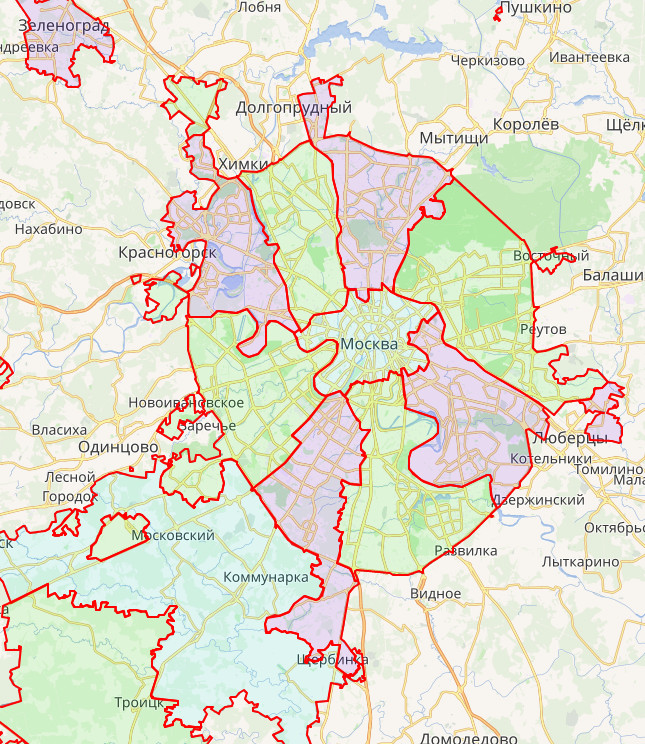

In [87]:
%%time
#для оценки оптимального количества мой компьютер может посчитать до 50 кластеров за разумное время 

k_inertia = []
ks = range(2, 30)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(df_grouped[['x', 'y']], )
    k_inertia.append(clf_kmeans.inertia_)


CPU times: user 12.7 s, sys: 8.35 s, total: 21 s
Wall time: 13.1 s


In [88]:
diff = np.diff(k_inertia)

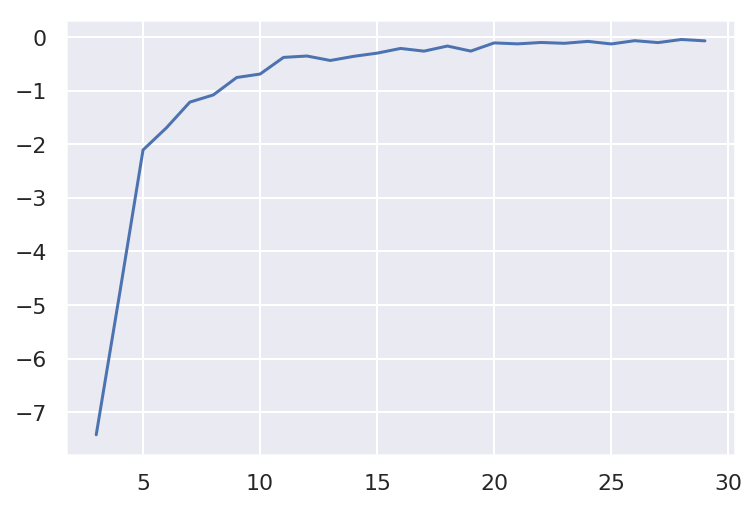

In [89]:
plt.plot(ks[1:], diff)

In [90]:
diff_r = diff[1:] / diff[:-1]

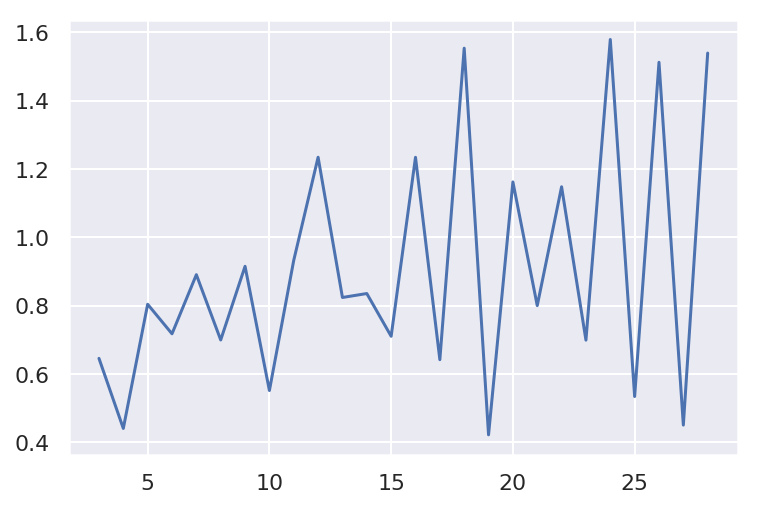

In [91]:
plt.plot(ks[1:-1], diff_r)

In [92]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

19

In [93]:
kmeans = KMeans(n_clusters=19, random_state=0).fit(df_grouped[['x', 'y']])

In [95]:
clusters = kmeans.predict(df_grouped[['x', 'y']])

In [96]:
clusters

array([15, 15, 15, ..., 14, 14, 14], dtype=int32)

In [97]:
kmeans.labels_

array([15, 15, 15, ..., 14, 14, 14], dtype=int32)

In [98]:
centers = kmeans.cluster_centers_
centers

array([[37.37475569, 55.87869582],
       [37.6234524 , 55.65311854],
       [37.5701682 , 55.731671  ],
       [37.6469118 , 55.8473511 ],
       [37.78750883, 55.80373174],
       [37.39715122, 55.81384488],
       [37.49110417, 55.78879246],
       [37.69775763, 55.61392563],
       [37.42013616, 55.70183371],
       [37.55298693, 55.57187871],
       [37.68764828, 55.76908049],
       [37.55814308, 55.86882296],
       [37.43799436, 55.84979543],
       [37.76621659, 55.71269479],
       [37.86077607, 55.71636971],
       [37.18729209, 55.98080436],
       [37.59147666, 55.78172538],
       [37.51078996, 55.67071618],
       [37.63606084, 55.74078992]])

In [103]:
path='/home/arseny/Pictures/mosmap adm.jpg'
map_adm=mpimg.imread(path)

([], <a list of 0 Text yticklabel objects>)

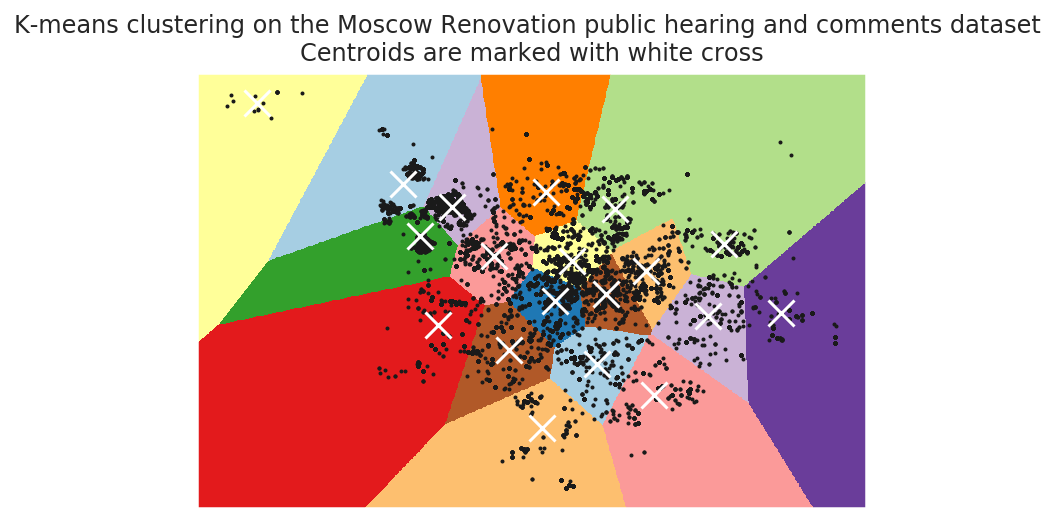

In [104]:
h = .001     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
xx, yy = np.meshgrid(np.arange(x_left, x_right, h), np.arange(y_down, y_up, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
#Z = kmeans.predict(xx, yy)

Z = Z.reshape(xx.shape)

#img = plt.imread("airlines.jpg")



fig, ax = plt.subplots()

#ax.imshow(map_adm, extent=[0, 400, 0, 300])
ax.imshow(map_adm, extent=[x_left, x_right, y_down, y_up])


plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(df_geo['x'], df_geo['y'], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)


#ax.imshow(map_adm)

plt.title('K-means clustering on the Moscow Renovation public hearing and comments dataset \n'
          'Centroids are marked with white cross')
plt.xlim(x_left, x_right)
plt.ylim(y_down, y_up)
plt.xticks(())
plt.yticks(())

#plt.show()

In [145]:
#map_adm = plt.imread('/home/arseny/Pictures/mosmap adm.jpg')
#fig, ax = plt.subplots()
#ax.imshow(map_adm)

In [66]:
KMeans?

In [23]:
clusters_random

array([0, 1, 0, ..., 0, 1, 0])

In [175]:
algorithms = [
    AffinityPropagation(),
    KMeans(n_clusters=19),
    AgglomerativeClustering(n_clusters=19),
    DBSCAN(eps=1/128, min_samples=2, algorithm='ball_tree', metric='haversine'),
]

In [106]:
def get_descr(algo_name, y_pred, X):
    return "{}\nARI {:.2f}\nSilhouette {:.2f}".format(
        algo_name,
#        adjusted_rand_score(y, y_pred),
        silhouette_score(X, y_pred)
    )

In [107]:
import warnings
warnings.filterwarnings('ignore')

In [108]:
#short_ver=df_geo[['x', 'y']].head(10000)

In [109]:
#short_ver

In [23]:
import geopy.distance

coords_1 = (55.47207725, 37.109692249999995)
coords_2 = ( 56.01903575, 37.97034875)

coords_3 = (55.0, 37.0)
coords_4 = (56.0, 37.0)

coords_5 = (55.0, 37.0)
coords_6 = (55.0, 38.0)

coords_7 = (55.0, 37.0)
coords_8 = (56.0, 38.0)

print(geopy.distance.vincenty(coords_1, coords_2).km)
print(geopy.distance.vincenty(coords_3, coords_4).km)
print(geopy.distance.vincenty(coords_5, coords_6).km)
print(geopy.distance.vincenty(coords_7, coords_8).km)

81.42316182595842
111.33269933264043
63.993584273308166
128.01513371349884


In [ ]:
#DBSCAN удалось вывести только отдельно

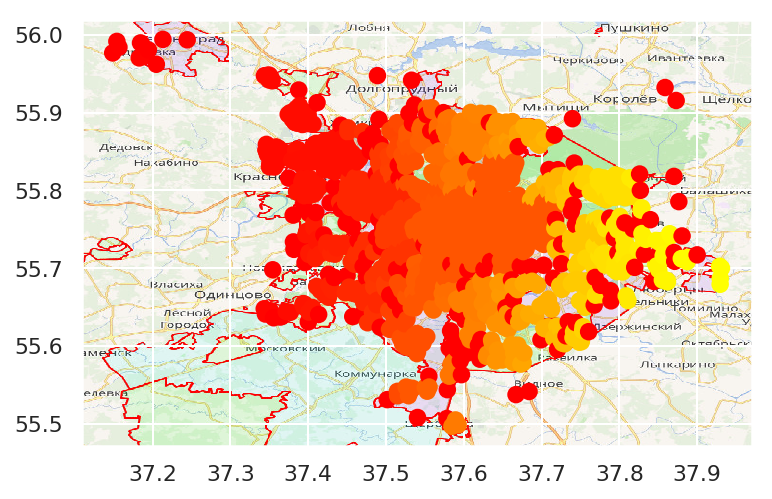

In [202]:
#cluster1 = AffinityPropagation().fit_predict(df_geo)
#cluster2=KMeans(n_clusters=27).fit_predict(df_geo[['x', 'y']])
#cluster3=AgglomerativeClustering(n_clusters=27).fit_predict(df_geo[['x', 'y']])
#%time cluster4=DBSCAN().fit_predict(short_ver)

fig, ax = plt.subplots()

#ax.imshow(map_adm, extent=[0, 400, 0, 300])
ax.imshow(map_adm, extent=[x_left, x_right, y_down, y_up])

epsilon=1/128
num=2
#%time 
cluster4=DBSCAN(eps=epsilon, min_samples=num, algorithm='ball_tree', metric='haversine').fit_predict(df_grouped[['x', 'y']])
#clusters=fit_predict(df_grouped[['x', 'y']])
#cluster4=DBSCAN().fit_predict(df_geo[['x', 'y']])
plt.scatter(df_grouped['x'], df_grouped['y'], c=cluster4, cmap='autumn', s=60)



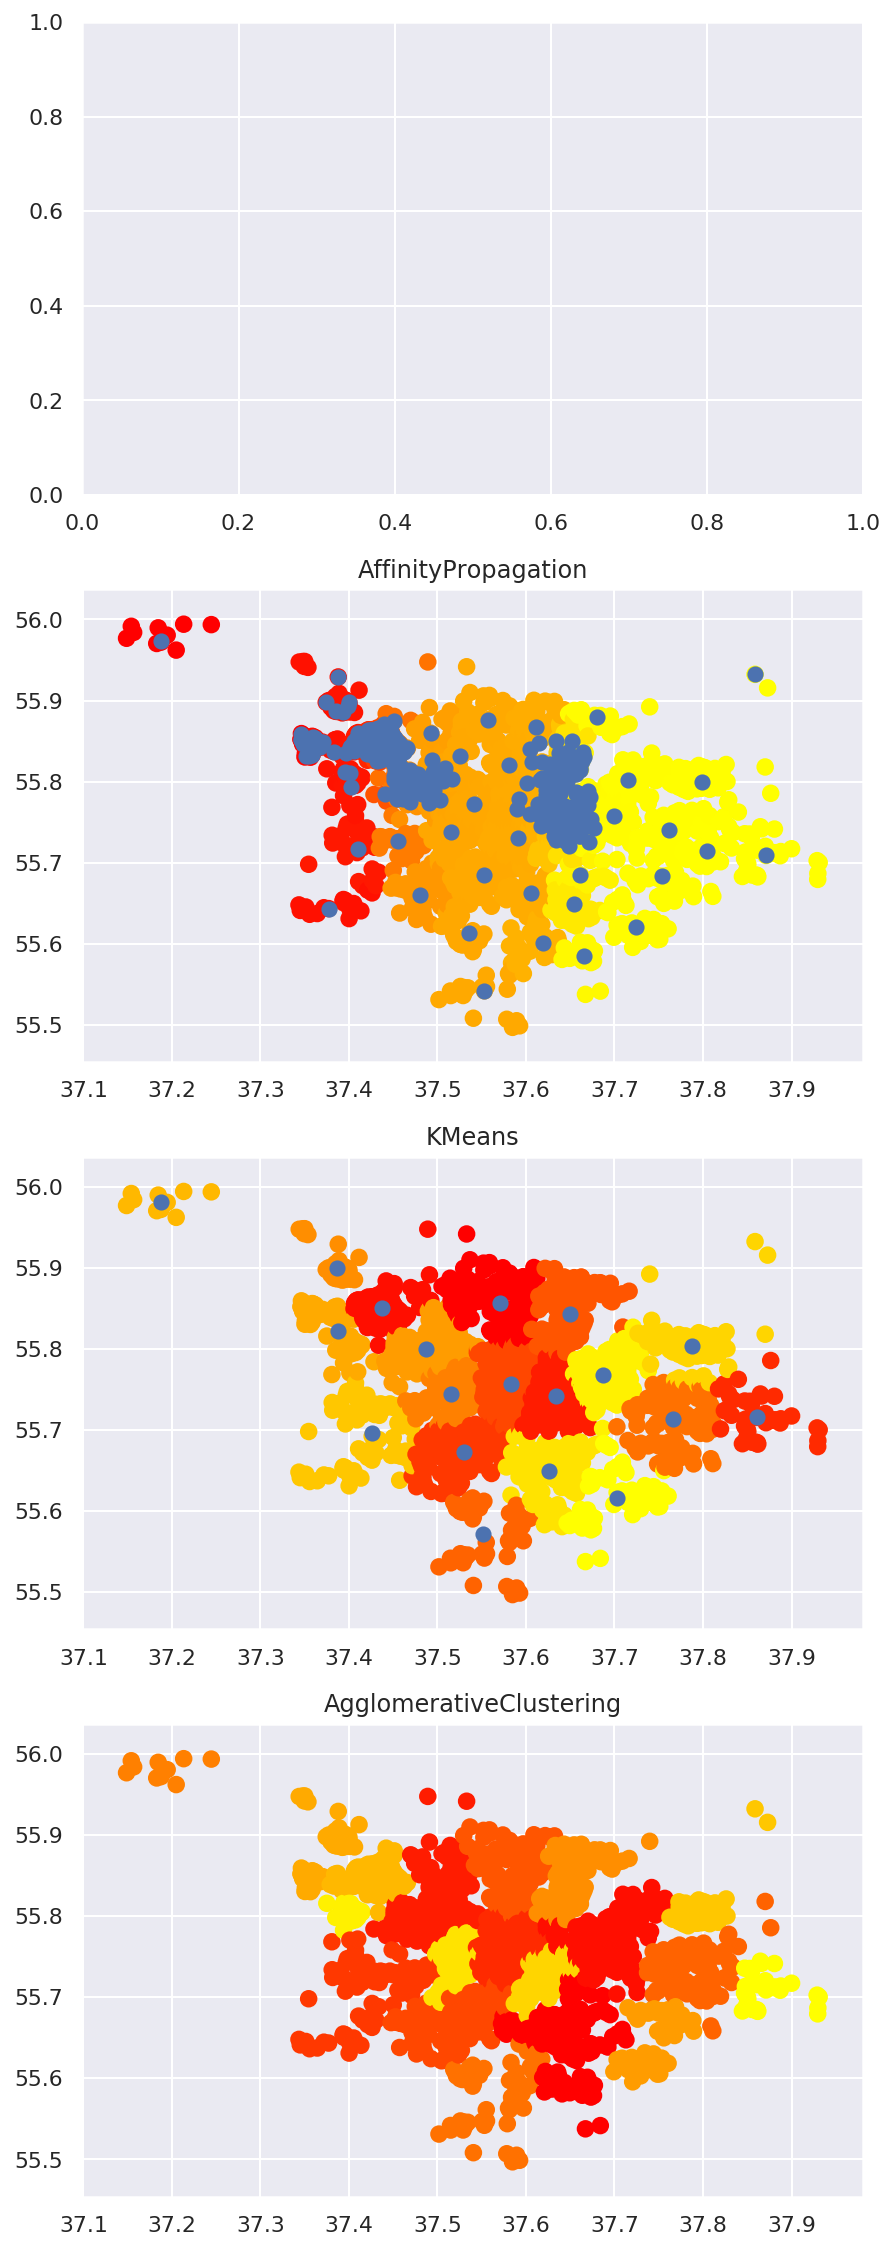

In [204]:
#df_geo[['x', 'y']]
fig, axes = plt.subplots(4, 1, figsize=(7, 20))
#axes[0].scatter(df_geo['x'], df_geo['y'], cmap='autumn', s=60)
#axes[0].set_title(get_descr("Random", c=27, df_geo[['x', 'y']]))
for ax, algorithm in zip(axes[1:], algorithms):
    # кластеризуем и выводим картинку
    clusters = algorithm.fit_predict(df_grouped[['x', 'y']])
    
    # отрисовка карты из jpg
    #fig, ax = plt.subplots()
    #ax.imshow(map_adm, extent=[x_left, x_right, y_down, y_up])
    
    ax.scatter(df_grouped['x'], df_grouped['y'], c=clusters, cmap='autumn', s=60)
    #ax.set_title(get_descr(algorithm.__class__.__name__, clusters, df_grouped[['x', 'y']]))
    ax.set_title(algorithm.__class__.__name__)
    
    # если есть центры кластеров - выведем их
    if algorithm.__class__.__name__ in {'KMeans', 'AffinityPropagation'}:
        centers = algorithm.cluster_centers_
        ax.scatter(centers[:, 0], centers[:, 1], s=50)

In [ ]:
#на глаз больше всего на районы похоже KMeans и AgglomerativeClustering

## аналогично исследовать скопления голосов за и против отдельно

In [183]:
df_positive= \
    df_geo_comment[df_geo_comment['comment_class']==1].groupby(['x', 'y'], as_index=False)['multiplier'].sum().rename(columns={'multiplier':'nmb'})

In [199]:
k_inertia = []
ks = range(2, 30)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(df_positive[['x', 'y']], )
    k_inertia.append(clf_kmeans.inertia_)
    
diff = np.diff(k_inertia)

diff_r = diff[1:] / diff[:-1]

k_opt = ks[np.argmin(diff_r)+1]
k_opt



24

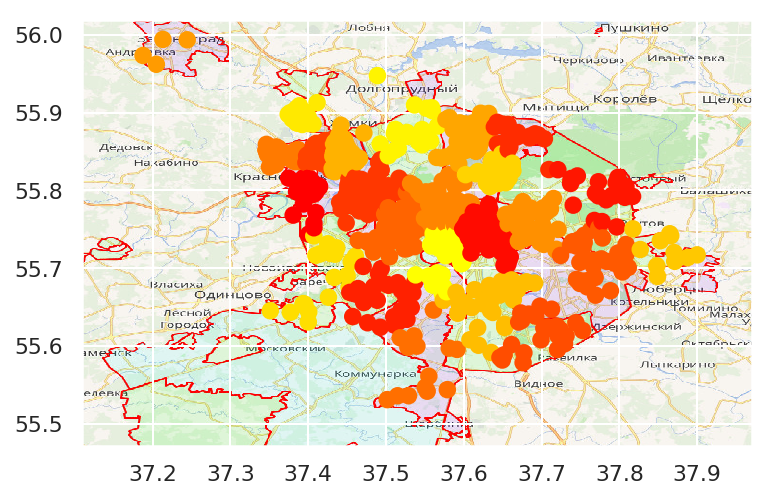

In [213]:
#from matplotlib.pyplot import figure
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

fig, ax = plt.subplots()

ax.imshow(map_adm, extent=[x_left, x_right, y_down, y_up])
num=24
cluster3=KMeans(n_clusters=24, random_state=0).fit_predict(df_positive[['x', 'y']])
plt.scatter(df_positive['x'], df_positive['y'], c=cluster3, cmap='autumn', s=60)
#plt.figure(figsize=(6.28,7.21))

In [208]:
#len(cluster3)

1194

In [184]:
df_negative= \
    df_geo_comment[df_geo_comment['comment_class']==-1].groupby(['x', 'y'], as_index=False)['multiplier'].sum().rename(columns={'multiplier':'nmb'})

In [200]:
k_inertia = []
ks = range(2, 30)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(df_negative[['x', 'y']], )
    k_inertia.append(clf_kmeans.inertia_)
    
diff = np.diff(k_inertia)

diff_r = diff[1:] / diff[:-1]

k_opt = ks[np.argmin(diff_r)+1]
k_opt

4

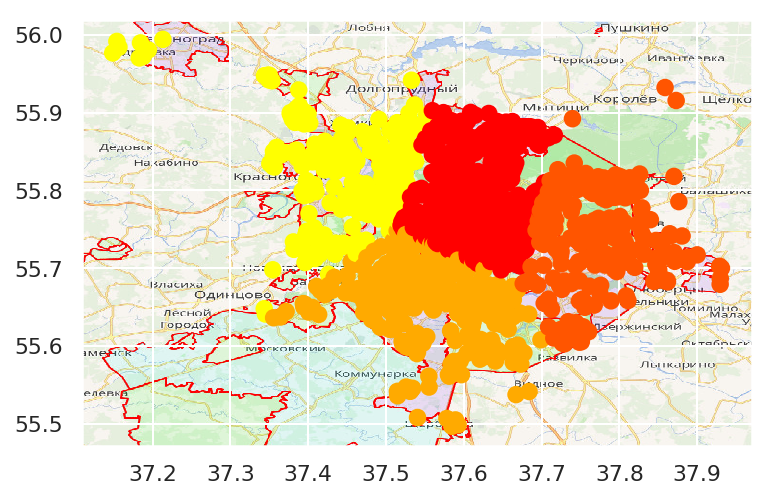

In [214]:
fig, ax = plt.subplots()

ax.imshow(map_adm, extent=[x_left, x_right, y_down, y_up])
num=24
cluster3=KMeans(n_clusters=4, random_state=0).fit_predict(df_negative[['x', 'y']])
plt.scatter(df_negative['x'], df_negative['y'], c=cluster3, cmap='autumn', s=60)

## подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)

In [ ]:
#сделано выше

## Дополнительные задания
найти наиболее активные в голосовании районы 
(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')

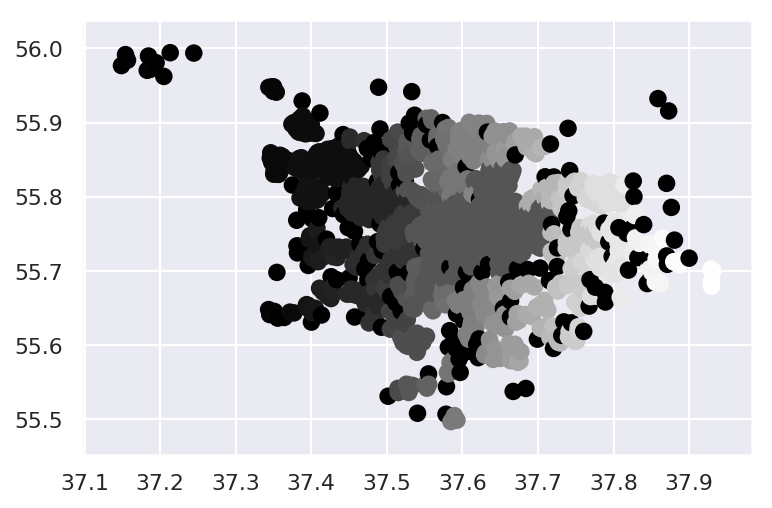

In [192]:
epsilon=1/128
num=2
#%time 
cluster4=DBSCAN(eps=epsilon, min_samples=num, algorithm='ball_tree', metric='haversine').fit_predict(df_grouped[['x', 'y']])
#clusters=fit_predict(df_grouped[['x', 'y']])
#cluster4=DBSCAN().fit_predict(df_geo[['x', 'y']])
plt.scatter(df_grouped['x'], df_grouped['y'], c=cluster4, cmap='gray', s=60)

## для тех, кто уже попробовал работу с текстом: 
выделить основные тематики комментариев жителей, 
можно использовать всю имеющуюся дополнительную информацию

In [ ]:
#c текстом пока мало поработал

In [197]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

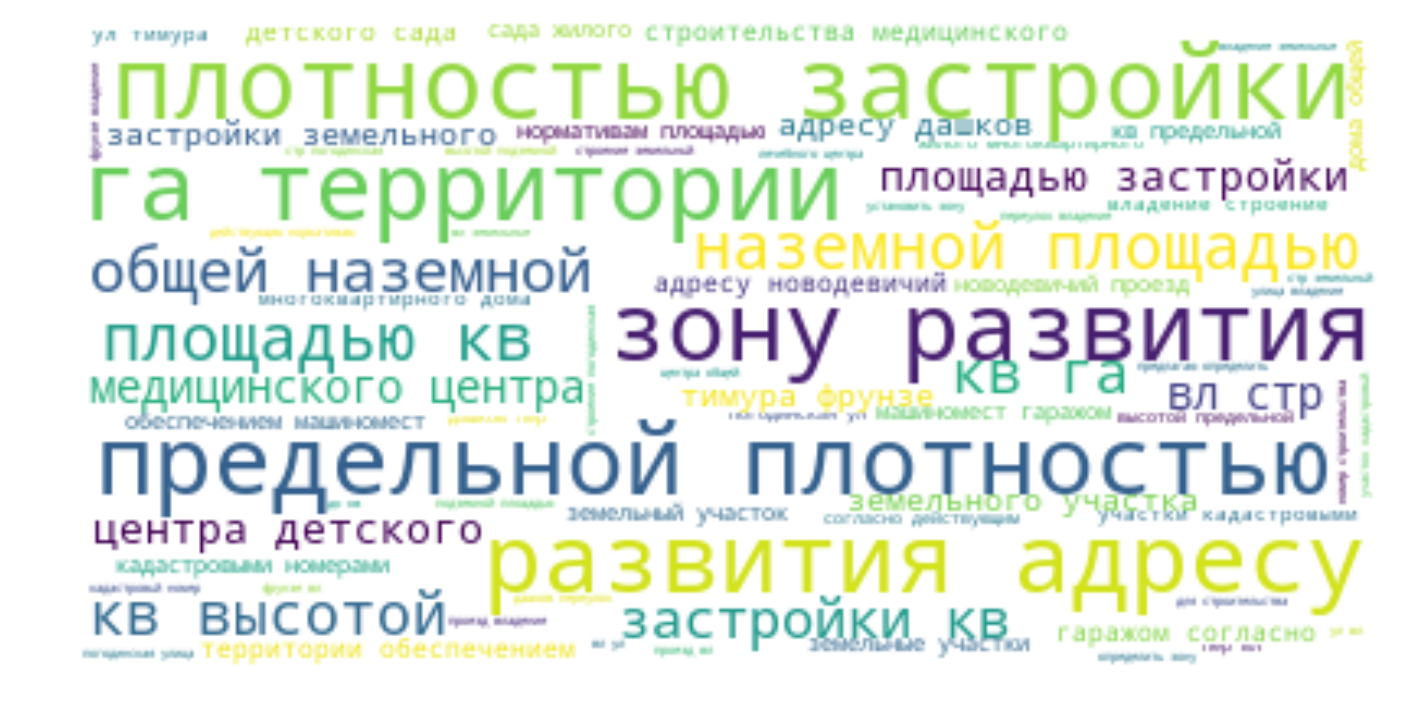

In [198]:
text = " ".join(review.lower() for review in df_geo_comment['comment'].head(1000))

lis=['на', 'из', 'по','без', 'что','для','до','но', 'от', \
         'меня','мы', 'мне','это', 'этого', 'все', 'всё', 'всего', 'они', 'всем','она','он', \
         'кто','что','вас', 'нас','какой', \
         'вам', 'нам', 'их', 'еще','ещё',\
         'или', 'и', 'а', \
         'нужно', 'надо','можно', 'может', 'могут','могу','будет', 'был','было','была','будут',\
         'так','если','как', 'только', 'даже','пока',\
         'не','ни','бы', 'но',\
         'да','нет',\
         'то','про','тоже','вы','еще','там','есть', \
         'ну','раз','тут','через','же','где','при','за','его',\
         'без', 'да', 'ты','уже',\
         'чему','очень','ли','вот', '<без медиафайлов>', 'без медиафайлов', 'медиафайлов']

# удаление из текста слова, отделенного слева пробелом, справа другим символом
for item in lis:
    text=text.replace(' '+item+' ', ' ')
    text=text.replace(' '+item+'.', ' ')
    text=text.replace(' '+item+',', ' ')
    text=text.replace(' '+item+'!', ' ')
    text=text.replace(' '+item+'?', ' ')
    text=text.replace(' '+item+'/n', ' /n ')
    text=text.replace(' '+item+'\n', ' \n ')
    text=text.replace('<'+item+'>', ' ')    

#for item in   df['author']:
#    text=text.replace(item, '')

wordcloud = WordCloud(background_color="white").generate(text)
#wordcloud = WordCloud().generate('вася вася петя')

fig, ax = plt.subplots(figsize=(11.7, 8.27) )
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()